In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Loading data and cleaning dataset
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases\
/breast-cancer-wisconsin/wdbc.data'

In [3]:
names = ['id_number', 'diagnosis', 'radius_mean',
         'texture_mean', 'perimeter_mean', 'area_mean',
         'smoothness_mean', 'compactness_mean',
         'concavity_mean','concave_points_mean',
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se',
         'area_se', 'smoothness_se', 'compactness_se',
         'concavity_se', 'concave_points_se',
         'symmetry_se', 'fractal_dimension_se',
         'radius_worst', 'texture_worst',
         'perimeter_worst', 'area_worst',
         'smoothness_worst', 'compactness_worst',
         'concavity_worst', 'concave_points_worst',
         'symmetry_worst', 'fractal_dimension_worst']
dx = ['Benign', 'Malignant']

In [4]:
data=pd.read_csv(urlopen(UCI_data_URL),names=names)

In [5]:
data.shape

(569, 32)

In [6]:
data.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
def inspect_summary(df):
    """Returns a inspection dataframe"""
    inspect_dataframe = pd.DataFrame({'DataType': df.dtypes, 'Unique values': df.nunique() ,
                  'Number of missing values': df.isnull().sum() ,
                  'Percentage missing': (df.isnull().sum() / len(df)) * 100,
                                      'Memory Usage (MB)':round(df.memory_usage(index=False) / 1024, 2)
                                     }).sort_values(by='Number of missing values', ascending = False)
    inspect_dataframe['Variance'] = df[inspect_dataframe.index].var()
    inspect_dataframe['Mean'] = df[inspect_dataframe.index].mean()
    inspect_dataframe['Min'] = df[inspect_dataframe.index].min()
    inspect_dataframe['Max'] = df[inspect_dataframe.index].max()
    return inspect_dataframe



ins_train = inspect_summary(data)
ins_train


,DataType,Unique values,Number of missing values,Percentage missing,Memory Usage (MB),Variance,Mean,Min,Max
id_number,int64,569,0,0.0,4.45,1.563015e+16,3.037183e+07,8670,911320502
diagnosis,object,2,0,0.0,4.45,NaN,NaN,B,M
symmetry_worst,float64,500,0,0.0,4.45,3.827584e-03,2.900756e-01,0.1565,0.6638
concave_points_worst,float64,492,0,0.0,4.45,4.320741e-03,1.146062e-01,0,0.291
concavity_worst,float64,539,0,0.0,4.45,4.352409e-02,2.721885e-01,0,1.252
compactness_worst,float64,529,0,0.0,4.45,2.475477e-02,2.542650e-01,0.02729,1.058
smoothness_worst,float64,411,0,0.0,4.45,5.213198e-04,1.323686e-01,0.07117,0.2226
area_worst,float64,544,0,0.0,4.45,3.241674e+05,8.805831e+02,185.2,4254
perimeter_worst,float64,514,0,0.0,4.45,1.129131e+03,1.072612e+02,50.41,251.2
texture_worst,float64,511,0,0.0,4.45,3.777648e+01,2.567722e+01,12.02,49.54


we can see no missing values in any features, and only one feature (diagnosis) is have 2 uniques values which are category values. we need to deal with them. we can use map function to make them binary values (1,0) 
this also show us the data is not distributed normal we can make nearly normal or close to normal by usig some techniques. 

In [8]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
data["diagnosis"]=data["diagnosis"].map({"M":1,"B":0})

In [10]:
target=data.diagnosis

In [11]:
data.set_index(["id_number"],inplace=True)

In [12]:
# For later use in CART models
names_index = names[2:]

let now look at the class imbalence (skewd classes)

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline

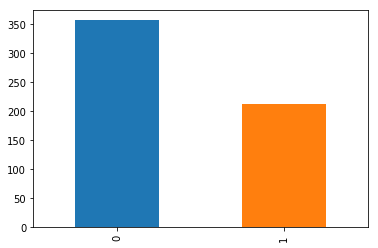

In [14]:
data.diagnosis.value_counts().plot.bar()

this show classes are not imbalced or skewd 

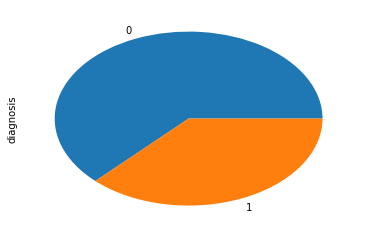

In [15]:
data.diagnosis.value_counts().plot.pie()

lets create traning set of 80% from data and use the remaning data as the test data set for the model validation. 

In [16]:
# seperating the target  values
target=data.diagnosis

In [17]:
data=data.drop("diagnosis", axis=1)

In [18]:
#spliting data into trai and test sets
from sklearn.model_selection import train_test_split,GridSearchCV
train_x, test_x, train_y,test_y=train_test_split(data,target,test_size=0.2,random_state=42)

In [19]:
# Cleaning test sets to avoid future warning messages
train_y = train_y.values.ravel()
test_y = test_y.values.ravel()
# use can use reshape function too

In [20]:
#creating models

from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(random_state=42)

In [21]:
parms={"max_depth":[1,2,3],"bootstrap":["True","False"],'max_features': ['auto', 'sqrt', 'log2', None],"criterion":["gini","entropy"]}

In [22]:
from sklearn.model_selection import GridSearchCV
cv_rf=GridSearchCV(model_rfc,cv=10,param_grid=parms,n_jobs=1)

In [23]:
cv_rf.fit(train_x,train_y)

/home/kalyan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_depth': [1, 2, 3], 'bootstrap': ['True', 'False'], 'max_features': ['auto', 'sqrt', 'log2', None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
print('Best Parameters using grid search: \n',cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}


In [25]:
# Set best parameters given by grid search
model_rfc.set_params(criterion = 'gini',
                  max_features = 'log2',
                  max_depth = 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
model_rfc.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rfc.set_params(n_estimators=i)
    model_rfc.fit(train_x, train_y)

    oob_error = 1 - model_rfc.oob_score_
    error_rate[i] = oob_error

In [27]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

Text(0.5,1,'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

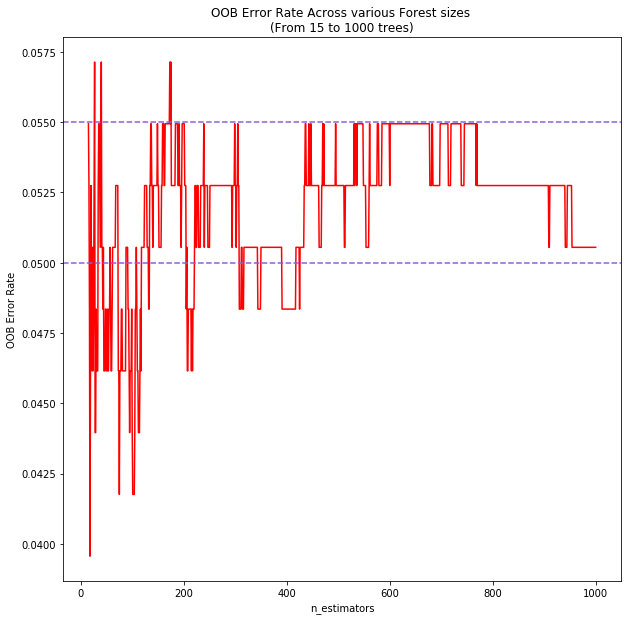

In [28]:
import seaborn as ans
fig,ax=plt.subplots(figsize=(10,10))

oob_series.plot(kind="line",color="red")
plt.axhline(0.055,
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05,
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

The OOB error rate starts to oscillate at around 400 trees, so I will go ahead and use 400 trees in my forest. Using the pandas series object, I can easily find the OOB error rate for the estimator as follows:

In [29]:
print("OOB error rate for 400 tress is {0:0.5f}".format(oob_series[400]))

OOB error rate for 400 tress is 0.04835


In [30]:
model_rfc.set_params(n_estimators=400,
              bootstrap = True,
              warm_start=False,
              oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
model_rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [32]:
importances_rfc = model_rfc.feature_importances_
indices_rfc = np.argsort(importances_rfc)[::-1]

In [33]:
def variable_importance(importance, indices):
    """
    Purpose:
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on gini or information gain for CART model.

    Parameters:
    ----------
    names:      Name of columns included in model
    importance: Array returned from feature_importances_ for CART
                   models organized by dataframe index
    indices:    Organized index of dataframe from largest to smallest
                   based on feature_importances_

    Returns:
    ----------
    Print statement outputting variable importance in descending order
    """
    print("Feature ranking:")

    for f in range(len(names_index)):
        i = f
        print("%d. The feature '%s' \
has a Mean Decrease in Gini of %f" % (f + 1,
                                         names_index[indices[i]],
                                         importance[indices[f]]))
   

In [34]:
variable_importance(importances_rfc, indices_rfc)

Feature ranking:
1. The feature 'area_worst' has a Mean Decrease in Gini of 0.129856
2. The feature 'perimeter_worst' has a Mean Decrease in Gini of 0.120953
3. The feature 'concave_points_worst' has a Mean Decrease in Gini of 0.115548
4. The feature 'concave_points_mean' has a Mean Decrease in Gini of 0.100136
5. The feature 'radius_worst' has a Mean Decrease in Gini of 0.078047
6. The feature 'concavity_mean' has a Mean Decrease in Gini of 0.062143
7. The feature 'area_mean' has a Mean Decrease in Gini of 0.056556
8. The feature 'radius_mean' has a Mean Decrease in Gini of 0.054567
9. The feature 'perimeter_mean' has a Mean Decrease in Gini of 0.051745
10. The feature 'area_se' has a Mean Decrease in Gini of 0.043261
11. The feature 'concavity_worst' has a Mean Decrease in Gini of 0.038659
12. The feature 'compactness_worst' has a Mean Decrease in Gini of 0.020329
13. The feature 'compactness_mean' has a Mean Decrease in Gini of 0.016163
14. The feature 'texture_worst' has a Mean Dec

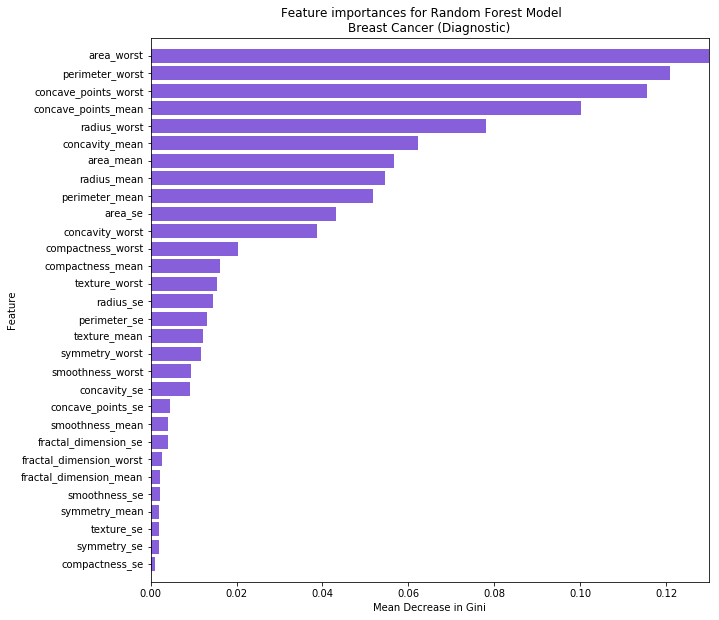

In [35]:
def variable_importance_plot(importance, indices):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    importance_desc: Array returned from feature_importances_ for CART
                    models organized in descending order

    indices: Organized index of dataframe from largest to smallest
                    based on feature_importances_
    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(29, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
         importance_desc,
         align="center",
         color = '#875FDB')
    plt.yticks(index,
           feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc))
    plt.xlabel('Mean Decrease in Gini')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

variable_importance_plot(importances_rfc, indices_rfc)

lets go on with cross-valdiation and look at how predictive power of our model is. Cross validation helps in understadting the generalization ofour model ( tells us whether our model is baised or not by averaging the predictions for different sets)

In [36]:
# 10 fold cross-valdiation
from sklearn.model_selection import KFold,cross_val_score
"""
    Purpose
    ----------
    Function helps automate cross validation processes while including
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model
    train:  Data_frame containing 80% of original dataframe
    val:     data_frame containing the respective target vaues
                  for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as
                  variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
            from cross validation score's standard deviation)"""
    
def cross_val_metric(fit,train, val, print_results=True):
    n= KFold(n_splits=10)
    scores=cross_val_score(fit, train,val,cv=n)
    if print_results:
        print("accuracy: {0:0.3f} (+/-{1:0.3f})".format(scores.mean(),scores.std()/2))
    else:
        return scores.mean(),scores.std()/2
        

In [37]:
cross_val_metric(model_rfc,train_x,train_y,print_results=True)

accuracy: 0.947 (+/-0.019)


Test Set Metrics

Using the test set that was created earlier, let's examine another metric for the evaluation of our model. You'll recall that that we didn't touch the test set until now — after we had completed hyperparamter optimization — to avoid the problem of data leakage. 

In [38]:
predictions_rfc=model_rfc.predict(test_x)

In [39]:
test_cross=pd.crosstab(index=test_y,columns=predictions_rfc)

In [40]:
test_cross=test_cross.rename(columns={0:"Benign",1:"Malignant"})
test_cross.index=["Bengin","Malignant"]
test_cross.columns.name="n=114"

In [41]:
#confusion matrix
test_cross

n=114,Benign,Malignant
Bengin,70,1
Malignant,3,40


In [61]:
accuracy_rfc=model_rfc.score(test_x,test_y)

print("mean accuracy of tet set {0:.3f}".format(accuracy_rfc))

mean accuracy of tet set 0.965


In [62]:
# Here we calculate the test error rate!
test_error_rate_rfc = 1 - accuracy_rfc
print("The test error rate for our model is: {0: .4f}".format(test_error_rate_rfc))

The test error rate for our model is:  0.0351


In [69]:
#ROC curve metrics
from sklearn.metrics import roc_curve,auc
fpr2, tpr2, _ = roc_curve(predictions_rfc,
                      test_y)
predictions_prob = model_rfc.predict_proba(test_x)[:, 1]

In [70]:
auc_rfc=auc(fpr,tpr)

In [71]:
def plot_roc_curve(fpr, tpr, auc, mod, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    fpr:  Array returned from sklearn.metrics.roc_curve for increasing
         false positive rates
    tpr:  Array returned from sklearn.metrics.roc_curve for increasing
         true positive rates
    auc:  Float returned from sklearn.metrics.auc (Area under Curve)
    mod:  String represenation of appropriate model, can only contain the
         following: ['knn', 'rf', 'nn']
    xlim: Set upper and lower x-limits
    ylim: Set upper and lower y-limits

    Returns:
    ----------
    Returns plot of Receiving Operating Curve for specific model. Allowing user to
    specify x and y-limits.
    """
    mod_list = ['knn', 'rf', 'nn']
    method = [('Kth Nearest Neighbor', 'deeppink'),
          ('Random Forest', 'red'),
          ('Neural Network', 'purple')]

    plot_title = ''
    color_value = ''
    for i in range(0, 3):
        if mod_list[i] == mod:
            plot_title = method[i][0]
            color_value = method[i][1]

    fig, ax = plt.subplots(figsize=(10, 10))
    

    plt.plot(fpr, tpr,
         color=color_value,
         linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f}) \
          \nBreast Cancer Diagnostic'\
          .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

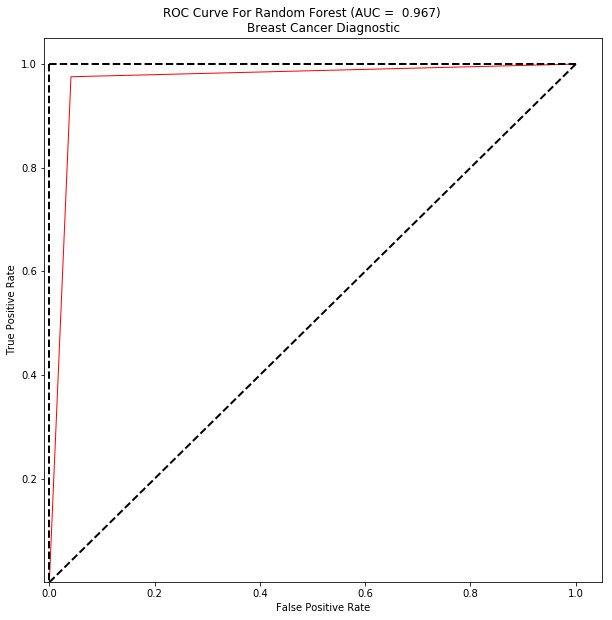

In [72]:
plot_roc_curve(fpr, tpr, auc_rfc, 'rf',
           xlim=(-0.01, 1.05),
           ylim=(0.001, 1.05))

In [84]:
"""Purpose
----------
Function helps automate the report generated by the sklearn package. Useful for multiple model comparison

Parameters
----------
Predictions:
The predictions made by the algorithm used alg_name: String containing the name of the algorithm used

Returns:
----------
Returns classification report generated from sklearn."""
def print_class_report(predictions, alg_name): 
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions,
        test_y,
        target_names = dx))


In [85]:
from sklearn.metrics import classification_report
class_report = print_class_report(predictions_rfc, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        73
   Malignant       0.93      0.98      0.95        41

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

